In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1 Linear Models
Linear models are usefull when data is available or for very large feature spaces as in text classification. in addition they form a good case study for regularization(sure overfitting does not occure).

مدل های خطی: مجموعه روش هایی (درنظر گرفته شده برای رگرسیون) که مدل هایی که با خط پیشبینی میشوند رو حل کرد

## 1.1 Linear Models for Regression
All linear models for regression learn a coefficient parameter ``coef_`` and an offset ``intercept_`` to make predictions using a linear combination of features: </br>
    ``` y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_ ``` </br>
The difference between the linear models for regression is what kind of restrictions or penalties are put on ``coef_`` as regularization , in addition to fitting the training data well.
The most standard linear model is the **ordinary least squares regression**, often simply called **linear regression**. It doesn't put any additional restrictions on ``coef_``, so when the number of features is large, it becomes ill-posed and the model overfits.</br>
Let us generate a simple simulation, to see the behavior of these models.

In [5]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# create dataset for regression model
X, y, true_coef = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60, test_size=140)

print('X_train.shape: {}, y_train.shape: {}'.format(X_train.shape, y_train.shape))

[[ 0.85949414  0.78103912 -0.57813527 ...  0.82804913  1.19961692
  -0.41294269]
 [ 0.37226978  1.31669419 -1.20844686 ... -1.02468459  1.69954809
   0.9357079 ]
 [ 0.12069005  0.43201176 -1.05647382 ... -0.42251963 -1.02186858
  -0.25977677]
 ...
 [-1.29658134  1.37105442 -0.87743738 ...  0.93011309 -0.0465144
  -1.47155834]
 [ 0.14318986 -0.03021291  0.72197624 ...  0.96400757  0.84518398
  -1.08214133]
 [-0.29941253  0.81263338 -1.2588623  ...  1.18558008 -0.51956027
   0.06226132]]
X_train.shape: (60, 30), y_train.shape: (60,)


### 1.1.1 Linear Regression

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

In [6]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
print("R^2 on training set: %f" % linreg.score(X_train, y_train))
print("R^2 on test set: %f" % linreg.score(X_test, y_test))

R^2 on training set: 0.878011
R^2 on test set: 0.216332


even we used Linear Regression and linear model, because we have few (feature)dimention, we accosted by overfitting, so what we have to do?

[ 0.          0.          2.12227127  0.          0.         49.25507875
  0.          0.          0.         15.07583458  0.          0.
 32.29058037  0.          0.          8.41487791  0.          0.
  0.         64.56924673  0.          0.          0.         70.85764943
  0.         34.28961765 88.17735659  0.         80.81291382  0.        ]


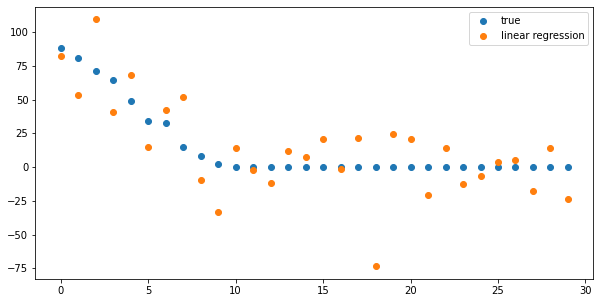

In [7]:
plt.figure(figsize=(10, 5))
coefsort = np.argsort(true_coef)[::-1]
print(true_coef)
plt.plot(true_coef[coefsort], 'o', label='true')
plt.plot(linreg.coef_[coefsort], 'o', label='linear regression')

plt.legend(loc='best')

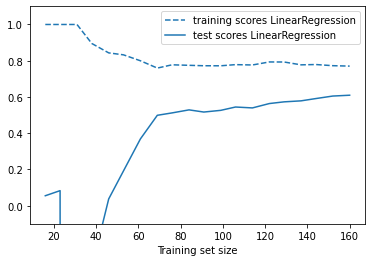

In [14]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()
plot_learning_curve(LinearRegression(), X, y)

### 1.1.2 Ridge Regression (L2 penalty)

**The Ridge estimator** is a simple regularization (called l2 penalty) of the ordinary LinearRegression. In particular, it has the benefit of being not computationally more expensive than the ordinary least square estimate.

`regularizatoion`: set of method to prevent over-fitting

$$ \text{min}_{w,b}  \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_2^2$$

the amount of regulariation is set via the `alpha` paarameter of the ridge.

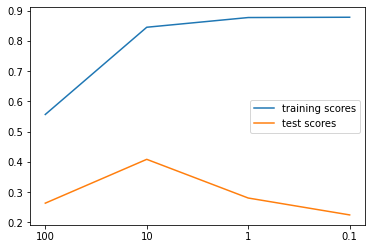

In [19]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, 0.1]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge
    
plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, 0.1])
plt.legend(loc="best")

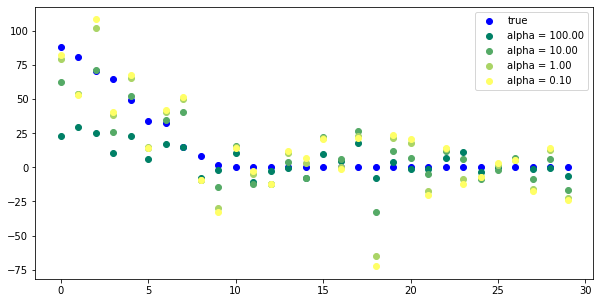

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(true_coef[coefsort], 'o', label="true", c='b')

for i, alpha in enumerate([100, 10, 1, 0.1]):
    plt.plot(ridge_models[alpha].coef_[coefsort], 'o', label='alpha = %.2f' % alpha, c=plt.cm.summer(i / 3.))

plt.legend()

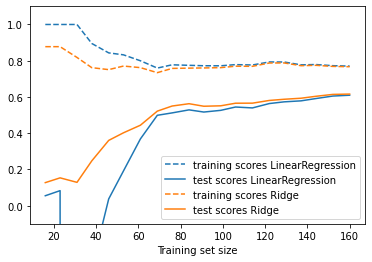

In [21]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

as we see, Ridge have advantage when we have a shortage of data

### 1.1.3 Lasso (L1 penalty)

**The Lasso estimator** is useful to impose sparsity on the coefficient. In other words, it is to be prefered if we believe that many of the features are not relevant. This is done via the so-called l1 penalty.
 $$ \text{min}_{w, b} \sum_i \frac{1}{2} || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_1$$

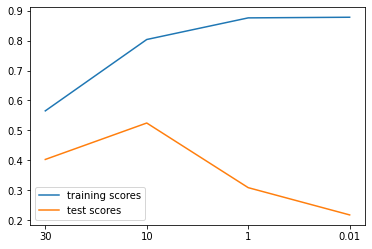

In [23]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
    
plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30, 10, 1, .01])
plt.legend(loc="best")

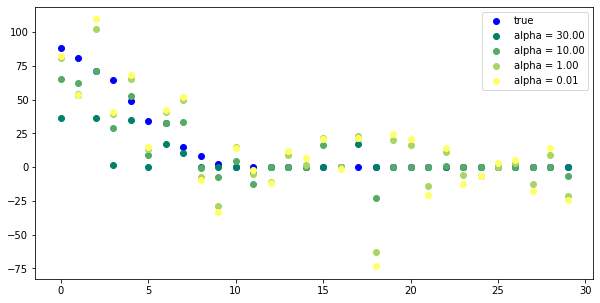

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(true_coef[coefsort], "o", label="true", c='b')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefsort], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

D:\Programming\Python\sample projects\ML\senv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.054e+01, tolerance: 4.958e+01
  model = cd_fast.enet_coordinate_descent(


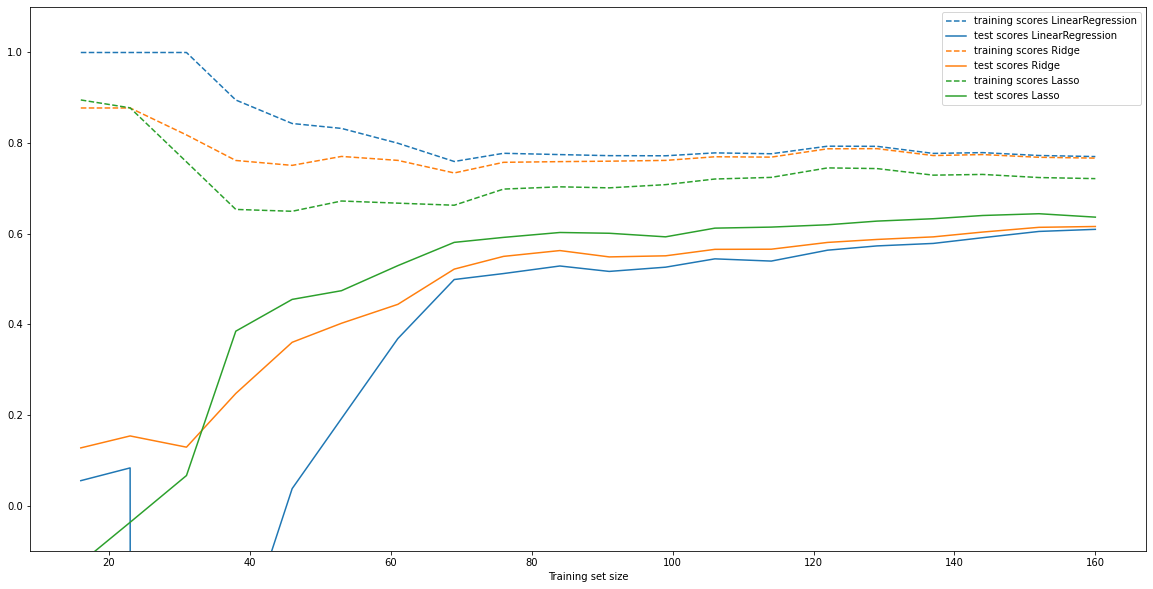

In [29]:
plt.figure(figsize=(20, 10))
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)
plot_learning_curve(Lasso(alpha=10), X, y)

### 1.1.4 ElasticNet
Linear regression with combined L1 and L2 priors as regularizer.
$$1 / (2 * n_samples) * ||y - Xw||^2_2 + \alpha * l1_ratio * ||w||_1 + 0.5 * \alpha * (1 - l1_ratio) * ||w||^2_2$$

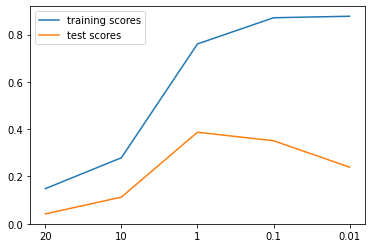

In [37]:
from sklearn.linear_model import ElasticNet

elasticnet_models = {}
training_scores = []
test_scores = []

for alpha in [20, 10, 1, 0.1, 0.01]:
    enreg = ElasticNet(alpha).fit(X_train, y_train)
    training_scores.append(enreg.score(X_train, y_train))
    test_scores.append(enreg.score(X_test, y_test))
    elasticnet_models[alpha] = enreg

plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(5), [20, 10, 1, 0.1, 0.01])
plt.legend(loc="best")